In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Regression**

In [ ]:
dft=pd.read_csv('/content/Salary_dataset.csv')

In [ ]:
dft.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
dft.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
dft.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
dft.shape

(30, 2)

In [ ]:
dft.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [ ]:
#checking for missing values
dft.isna().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
#checking for outliers in the dataset
Q1=dft['YearsExperience'].quantile(0.25)
Q2=dft['YearsExperience'].quantile(0.50)
Q3=dft['YearsExperience'].quantile(0.75)
iqr=Q3-Q1
lower=Q1-(1.5*iqr)
upper=Q3+(1.5*iqr)
print(dft[(dft['YearsExperience']<lower) | (dft['YearsExperience']>upper)].index)

Index([], dtype='int64')


In [ ]:
y=dft['Salary']
x=dft.drop('Salary',axis=1)

In [ ]:
x.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [ ]:
#splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#model building : linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
#evaluvating the model using mean squared error and r2 score
from sklearn.metrics import mean_squared_error,r2_score
print('mse : ',mean_squared_error(y_test,y_pred))

mse :  49830096.855908394


In [ ]:
print('R squared : ',r2_score(y_test,y_pred))

R squared :  0.9024461774180497


In [ ]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
lr2=LinearRegression()
lr2.fit(x_train_poly,y_train)

LinearRegression()

In [ ]:
y_pred_poly=lr2.predict(x_test_poly)

In [ ]:
mean_squared_error(y_test,y_pred_poly)

52527916.3687748

In [ ]:
print('R squared : ',r2_score(y_test,y_pred_poly))

R squared :  0.8971645780890873


# **classification**

In [ ]:
df=pd.read_csv('/content/Loan_Default.csv')

In [ ]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.shape

(148670, 34)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [ ]:
df.isna().sum()/len(df)*100

,0
ID,0.000000
year,0.000000
loan_limit,2.249277
Gender,0.000000
approv_in_adv,0.610749
loan_type,0.000000
loan_purpose,0.090133
Credit_Worthiness,0.000000
open_credit,0.000000
business_or_commercial,0.000000


In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
#calculating the skewness
for i in num_cols:
    skewness = df[i].skew()
    print(f'Skewness of {i}: {skewness}')

Skewness of ID: 0.0
Skewness of year: 0.0
Skewness of loan_amount: 1.6669980938622415
Skewness of rate_of_interest: 0.3884060270841701
Skewness of Interest_rate_spread: 0.28076233013056445
Skewness of Upfront_charges: 1.7540756791547982
Skewness of term: -2.1748217958156495
Skewness of property_value: 4.586275832462365
Skewness of income: 17.307695079866924
Skewness of Credit_Score: 0.004766756957725898
Skewness of LTV: 120.61533746802151
Skewness of Status: 1.1767622665586932
Skewness of dtir1: -0.5514649624329434


In [ ]:
#filling the columns with mean because of its symmetrical nature
# for i in ['rate_of_interest','Interest_rate_spread']:
#     df[i].fillna(df[i].mean(),inplace=True)


In [ ]:
#filling the columns with median because of its skewness
for i in ['rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','LTV','dtir1']:
    df[i].fillna(df[i].median(),inplace=True)

In [ ]:
df.isna().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [ ]:
#fill with mode
for i in ['loan_limit','approv_in_adv','loan_purpose','Neg_ammortization','age','submission_of_application']:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [ ]:
df.isna().sum()

,0
ID,0
year,0
loan_limit,0
Gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [ ]:
# finding number of unique values
for i in df.columns:
    print(f' {i} : {df[i].nunique()}')

 ID : 148670
 year : 1
 loan_limit : 2
 Gender : 4
 approv_in_adv : 2
 loan_type : 3
 loan_purpose : 4
 Credit_Worthiness : 2
 open_credit : 2
 business_or_commercial : 2
 loan_amount : 211
 rate_of_interest : 131
 Interest_rate_spread : 22516
 Upfront_charges : 58272
 term : 26
 Neg_ammortization : 2
 interest_only : 2
 lump_sum_payment : 2
 property_value : 385
 construction_type : 2
 occupancy_type : 3
 Secured_by : 2
 total_units : 4
 income : 1001
 credit_type : 4
 Credit_Score : 401
 co-applicant_credit_type : 2
 age : 7
 submission_of_application : 2
 LTV : 8484
 Region : 4
 Security_Type : 2
 Status : 2
 dtir1 : 57


In [ ]:
#dropping these two columns because year contain same value for all rows and id contain full unique values
#and is not linearly related
df=df.drop(['ID','year'],axis=1)

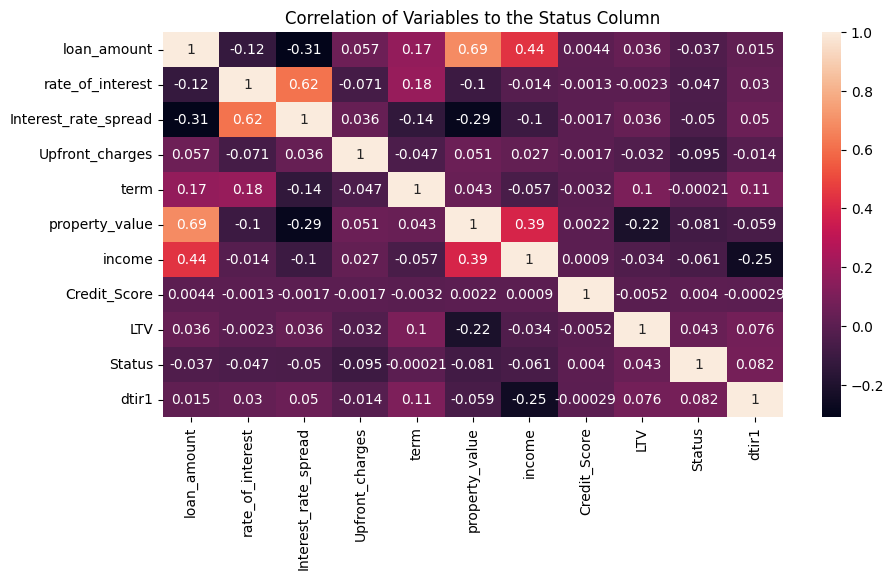

In [ ]:
#plotting the correlation of features
plt.figure(figsize=(10,5))
corrmatrix=df[['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1']].corr()
sns.heatmap(corrmatrix,annot=True)
plt.title('Correlation of Variables to the Status Column')
plt.show()

In [ ]:
#dropping the two column that has been highly correlated with loan amount and rate of interest
df=df.drop(['loan_amount','Interest_rate_spread'],axis=1)

In [ ]:
#calculating value counts
for i in cat_cols:
    print(df[i].value_counts())

loan_limit
cf     138692
ncf      9978
Name: count, dtype: int64
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64
approv_in_adv
nopre    125529
pre       23141
Name: count, dtype: int64
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64
loan_purpose
p3    56068
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64
Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64
open_credit
nopc    148114
opc        556
Name: count, dtype: int64
business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64
Neg_ammortization
not_neg    133541
neg_amm     15129
Name: count, dtype: int64
interest_only
not_int     141560
int_only      7110
Name: count, dtype: int64
lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64
construction_type
sb    148637
mh        33
Name: count, dtype: int64
occupancy_type
pr    13

In [ ]:
#checking for outliers
for i in ['Upfront_charges','LTV']:
    Q1=df[i].quantile(0.25)
    Q2=df[i].quantile(0.50)
    Q3=df[i].quantile(0.75)
    iqr=Q3-Q1
    lower=Q1-(1.5*iqr)
    upper=Q3+(1.5*iqr)
    out=df[(df[i]<lower) | (df[i]>upper)]
    print(f'Column: {i}, Number of outliers: {(len(out) / len(df)) * 100}')

Column: Upfront_charges, Number of outliers: 5.996502320575772
Column: LTV, Number of outliers: 3.141857805878792


In [ ]:
#handling outliers
for column in ['Upfront_charges','LTV']:
        median = df[column].median()
        df[column] = np.where((df[column] < lower) | (df[column] > upper), median, df[column])

In [ ]:
#convert age column by mid value
def convert_midpoint(age):
    if '-' in age:
        lower, upper = map(int, age.split('-'))
        return (lower + upper) / 2
    elif '<' in age:
        return float(age.replace('<', '').strip()) - 0.5  # Example value
    elif '>' in age:
        return float(age.replace('>', '').strip()) + 0.5  # Example value
    return np.nan

In [ ]:
df['age'] = df['age'].apply(convert_midpoint)

In [ ]:
df['Gender'] = df['Gender'].replace('Sex Not Available', pd.NA)

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
# encoding
df['total_units'] = df['total_units'].replace({'1U': 1, '2U': 2, '3U': 3, '4U': 4})

In [ ]:
cat_cols

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [ ]:
#one hot encoding
cols_one_hot=['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'credit_type',
 'co-applicant_credit_type',
 'submission_of_application',
 'Region',
 'Security_Type']
df = pd.get_dummies(df, columns=cols_one_hot)

In [ ]:
df.head()

,rate_of_interest,Upfront_charges,term,property_value,total_units,income,Credit_Score,age,LTV,Status,...,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,3.99,2596.45,360.0,118000.0,1,1740.0,758,29.5,98.728814,1,...,True,False,False,True,False,False,False,True,False,True
1,3.99,2596.45,360.0,418000.0,1,4980.0,552,59.5,75.135870,1,...,False,True,False,True,True,False,False,False,False,True
2,4.56,2596.45,360.0,508000.0,1,9480.0,834,39.5,80.019685,0,...,True,False,False,True,False,False,False,True,False,True
3,4.25,2596.45,360.0,658000.0,1,11880.0,587,49.5,69.376900,0,...,True,False,True,False,True,False,False,False,False,True
4,4.00,2596.45,360.0,758000.0,1,10440.0,602,29.5,91.886544,0,...,False,True,True,False,True,False,False,False,False,True


In [ ]:
# min max scaling
x=df.drop('Status',axis=1)
y=df['Status']

In [ ]:
x1=x.copy()

In [ ]:
x1.columns

Index(['rate_of_interest', 'Upfront_charges', 'term', 'property_value',
       'total_units', 'income', 'Credit_Score', 'age', 'LTV', 'dtir1',
       'loan_limit_cf', 'loan_limit_ncf', 'Gender_Female', 'Gender_Joint',
       'Gender_Male', 'approv_in_adv_nopre', 'approv_in_adv_pre',
       'loan_type_type1', 'loan_type_type2', 'loan_type_type3',
       'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2',
       'open_credit_nopc', 'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_ir', 'occupancy_type_pr',
       'occupancy_type_sr', 'Secured_by_home', 'Secured_by_land',
       'credit_type_CIB', 'credit_type_CRIF', 'credi

In [ ]:
x1.drop(['total_units','loan_limit_cf', 'loan_limit_ncf', 'Gender_Female', 'Gender_Joint',
       'Gender_Male', 'approv_in_adv_nopre', 'approv_in_adv_pre',
       'loan_type_type1', 'loan_type_type2', 'loan_type_type3',
       'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2',
       'open_credit_nopc', 'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_ir', 'occupancy_type_pr',
       'occupancy_type_sr', 'Secured_by_home', 'Secured_by_land',
       'credit_type_CIB', 'credit_type_CRIF', 'credit_type_EQUI',
       'credit_type_EXP', 'co-applicant_credit_type_CIB',
       'co-applicant_credit_type_EXP', 'submission_of_application_not_inst',
       'submission_of_application_to_inst', 'Region_North',
       'Region_North-East', 'Region_central', 'Region_south',
       'Security_Type_Indriect', 'Security_Type_direct'],axis=1,inplace= True)

In [ ]:
x1.columns

Index(['rate_of_interest', 'Upfront_charges', 'term', 'property_value',
       'income', 'Credit_Score', 'age', 'LTV', 'dtir1'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x1=scaler.fit_transform(x1)

In [ ]:
x1=pd.DataFrame(x1,columns=['rate_of_interest', 'Upfront_charges', 'term', 'property_value','income', 'Credit_Score', 'age', 'LTV', 'dtir1'])

In [ ]:
x1.head()

,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,age,LTV,dtir1
0,0.49875,1.0,1.0,0.006667,0.003007,0.6450,0.1,0.788605,0.714286
1,0.49875,1.0,1.0,0.024848,0.008607,0.1300,0.7,0.513231,0.607143
2,0.57000,1.0,1.0,0.030303,0.016385,0.8350,0.3,0.570234,0.732143
3,0.53125,1.0,1.0,0.039394,0.020533,0.2175,0.5,0.446012,0.660714
4,0.50000,1.0,1.0,0.045455,0.018044,0.2550,0.1,0.708743,0.607143


In [ ]:
x2=x.drop(['rate_of_interest', 'Upfront_charges', 'term', 'property_value',
        'income', 'Credit_Score', 'age', 'LTV', 'dtir1'],axis=1)

In [ ]:
x=pd.concat([x1,x2],axis=1)

In [ ]:
x.head()

,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,age,LTV,dtir1,total_units,...,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,0.49875,1.0,1.0,0.006667,0.003007,0.6450,0.1,0.788605,0.714286,1,...,True,False,False,True,False,False,False,True,False,True
1,0.49875,1.0,1.0,0.024848,0.008607,0.1300,0.7,0.513231,0.607143,1,...,False,True,False,True,True,False,False,False,False,True
2,0.57000,1.0,1.0,0.030303,0.016385,0.8350,0.3,0.570234,0.732143,1,...,True,False,False,True,False,False,False,True,False,True
3,0.53125,1.0,1.0,0.039394,0.020533,0.2175,0.5,0.446012,0.660714,1,...,True,False,True,False,True,False,False,False,False,True
4,0.50000,1.0,1.0,0.045455,0.018044,0.2550,0.1,0.708743,0.607143,1,...,False,True,True,False,True,False,False,False,False,True


In [ ]:
#splitting into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[21284,  1210],
       [ 1190,  6050]])

In [ ]:
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('Precision : ',precision_score(y_test,y_pred))

Accuracy :  0.9192843209793502
Recall :  0.835635359116022
Precision :  0.8333333333333334


In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[21284,  1210],
       [ 1190,  6050]])

In [ ]:
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('Precision : ',precision_score(y_test,y_pred))

Accuracy :  0.9192843209793502
Recall :  0.835635359116022
Precision :  0.8333333333333334


In [ ]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [ ]:
y_pred=gnb.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[22396,    98],
       [ 3936,  3304]])

In [ ]:
print('Accuracy= ',accuracy_score(y_test,y_pred))
print('Precision= ',precision_score(y_test,y_pred))
print('Recall= ',recall_score(y_test,y_pred))

Accuracy=  0.8643303961794578
Precision=  0.9711934156378601
Recall=  0.456353591160221


In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[22267,   227],
       [ 3679,  3561]])

In [ ]:
print('Accuracy= ',accuracy_score(y_test,y_pred))
print('Precision= ',precision_score(y_test,y_pred))
print('Recall= ',recall_score(y_test,y_pred))

Accuracy=  0.8686352323938925
Precision=  0.9400739176346357
Recall=  0.49185082872928176


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
metric_k=[]
n=np.arange(3,15)


for k in n:
    clf=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [ ]:
metric_k

[0.8441514764242954,
 0.8593865608394431,
 0.8537028317750723,
 0.8608999798210802,
 0.8597228761686958,
 0.8617071366112867,
 0.8603282437613506,
 0.8630523979282976,
 0.8625479249344186,
 0.8633214501916997,
 0.8632205555929239,
 0.8632878186587745]

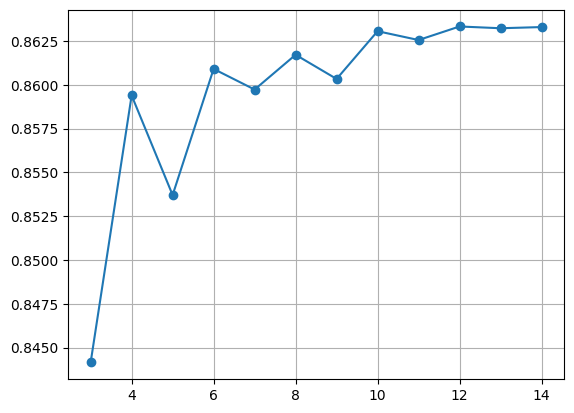

In [ ]:
plt.plot(n,metric_k,'o-')
plt.grid()

In [ ]:
clf=KNeighborsClassifier(n_neighbors=12)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[22332,   162],
       [ 3902,  3338]])

In [ ]:
print('Accuracy= ',accuracy_score(y_test,y_pred))
print('Precision= ',precision_score(y_test,y_pred))
print('Recall= ',recall_score(y_test,y_pred))

Accuracy=  0.8633214501916997
Precision=  0.9537142857142857
Recall=  0.46104972375690606
